# Generic notebook for GeneLab DESeq2 analysis
Input file are un-normalized counts from GeneLab and a csv with experimental design. Analysis of GLDS-274 used as example.

In [1]:
library(DESeq2)

Warning message:
“package ‘DESeq2’ was built under R version 4.0.3”
Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built under R version 4.0.3”
Loading required package: stats4

Loading required package: BiocGenerics

Warning message:
“package ‘BiocGenerics’ was built under R version 4.0.5”
Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, past

In [4]:
system("wget -O counts.csv \'https://genelab-data.ndc.nasa.gov/genelab/static/media/dataset/GLDS-274_rna_seq_Unnormalized_Counts.csv?version=1\'")

In [11]:
cts <- round(as.matrix(read.csv('counts.csv',sep=",",check.names=FALSE,row.names=1)))
head(cts)

,Mmus_C57-6J_SLS_I_GF_FirstSet_Rep1_M2,Mmus_C57-6J_SLS_I_GF_FirstSet_Rep2_M3,Mmus_C57-6J_SLS_I_GF_FirstSet_Rep3_M4,Mmus_C57-6J_SLS_I_GF_FirstSet_Rep4_M13,Mmus_C57-6J_SLS_I_GF_SecondSet_Rep1_M7,Mmus_C57-6J_SLS_I_GF_SecondSet_Rep2_M11,Mmus_C57-6J_SLS_I_GF_SecondSet_Rep3_M15,Mmus_C57-6J_SLS_I_GF_SecondSet_Rep4_M18,Mmus_C57-6J_SLS_I_GF_ThirdSet_Rep1_M12,Mmus_C57-6J_SLS_I_GF_ThirdSet_Rep2_M20,⋯,Mmus_C57-6J_SLS_WCar_CryoC_FourthSet_Rep3_M68,Mmus_C57-6J_SLS_WCar_CryoC_FourthSet_Rep4_M73,Mmus_C57-6J_SLS_WCar_DI_CTRLSet_Rep1_M34,Mmus_C57-6J_SLS_WCar_DI_CTRLSet_Rep2_M43,Mmus_C57-6J_SLS_WCar_DI_CTRLSet_Rep3_M54,Mmus_C57-6J_SLS_WCar_DI_CTRLSet_Rep4_M77,Mmus_C57-6J_SLS_WCar_LN2_CTRLSet_Rep1_M28,Mmus_C57-6J_SLS_WCar_LN2_CTRLSet_Rep2_M51,Mmus_C57-6J_SLS_WCar_LN2_CTRLSet_Rep3_M64,Mmus_C57-6J_SLS_WCar_LN2_CTRLSet_Rep4_M80
ENSMUSG00000000001,2,2,1,1,12,10,6,6,2,1,⋯,11,0,1,0,7,7,2,1,5,6
ENSMUSG00000000003,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000000028,0,0,0,0,6,5,3,1,0,1,⋯,3,2,2,0,3,5,3,2,0,0
ENSMUSG00000000031,548,19,163,437,1677,1332,965,843,887,536,⋯,1245,401,1657,271,2152,2232,374,520,544,290
ENSMUSG00000000037,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000000049,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [24]:
coldata <- read.csv('SampleAssaySimpleReducded.csv', row.names=1)
coldata$Dissection <- factor(coldata$Dissection)
coldata$Preservation <- factor(coldata$Preservation)
coldata$Dissection_Preservation <- factor(coldata$Dissection_Preservation)
head(coldata)

,Dissection,Preservation,Dissection_Preservation
,<fct>,<fct>,<fct>
Mmus_C57-6J_SLS_I_GF_FirstSet_Rep1_M2,Immediate,GloveboxFreezer,ImmediateGloveboxFreezer
Mmus_C57-6J_SLS_I_GF_FirstSet_Rep2_M3,Immediate,GloveboxFreezer,ImmediateGloveboxFreezer
Mmus_C57-6J_SLS_I_GF_FirstSet_Rep3_M4,Immediate,GloveboxFreezer,ImmediateGloveboxFreezer
Mmus_C57-6J_SLS_I_GF_FirstSet_Rep4_M13,Immediate,GloveboxFreezer,ImmediateGloveboxFreezer
Mmus_C57-6J_SLS_I_GF_SecondSet_Rep1_M7,Immediate,GloveboxFreezer,ImmediateGloveboxFreezer
Mmus_C57-6J_SLS_I_GF_SecondSet_Rep2_M11,Immediate,GloveboxFreezer,ImmediateGloveboxFreezer


In [25]:
all(rownames(coldata) %in% colnames(cts))

[1] TRUE

In [26]:
all(rownames(coldata) == colnames(cts))

[1] TRUE

In [27]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design = ~ Dissection_Preservation)
dds

converting counts to integer mode



class: DESeqDataSet 
dim: 55579 41 
metadata(1): version
assays(1): counts
rownames(55579): ENSMUSG00000000001 ENSMUSG00000000003 ... ERCC-00170
  ERCC-00171
rowData names(0):
colnames(41): Mmus_C57-6J_SLS_I_GF_FirstSet_Rep1_M2
  Mmus_C57-6J_SLS_I_GF_FirstSet_Rep2_M3 ...
  Mmus_C57-6J_SLS_WCar_LN2_CTRLSet_Rep3_M64
  Mmus_C57-6J_SLS_WCar_LN2_CTRLSet_Rep4_M80
colData names(3): Dissection Preservation Dissection_Preservation

In [28]:
keep <- rowSums(counts(dds)) > 0
dds <- dds[keep,]

In [29]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 118 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [30]:
vsd <- vst(dds, blind=FALSE)

In [31]:
sampleDists <- dist(t(assay(vsd)))

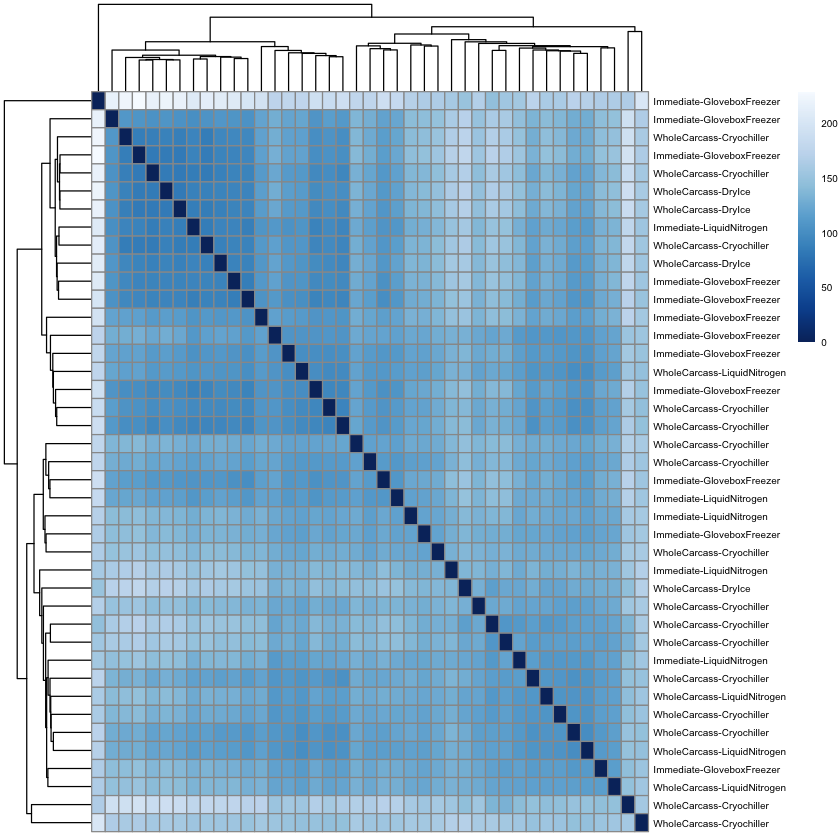

In [32]:
library("pheatmap")
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd$Dissection, vsd$Preservation, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors,fontsize = 6)

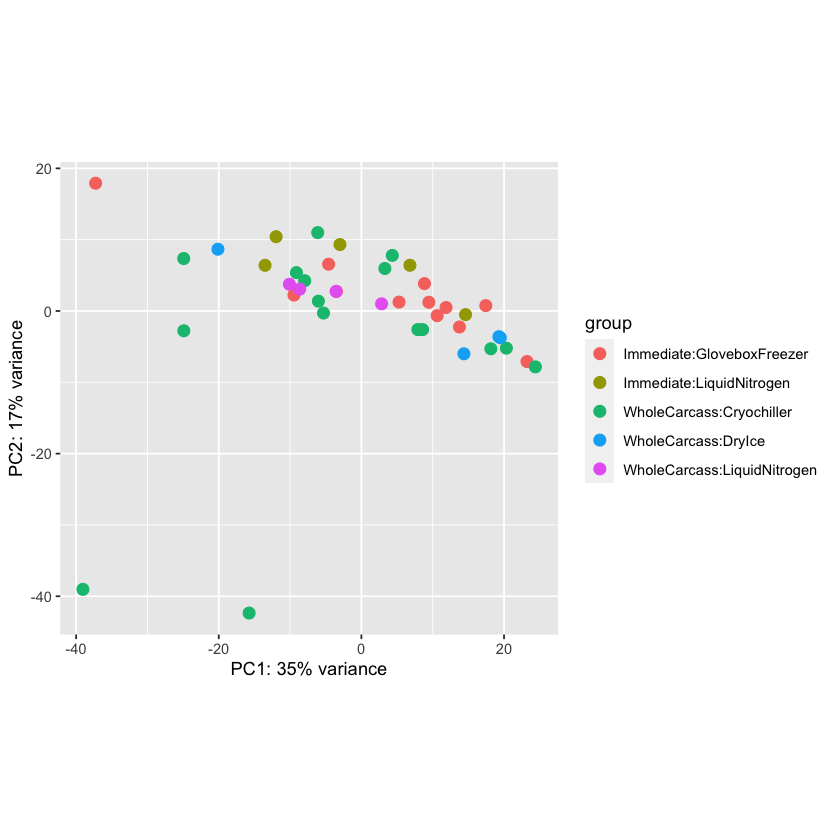

In [35]:
plotPCA(vsd, intgroup=c("Dissection","Preservation"))

In [36]:
res = results(dds, alpha=0.05, lfcThreshold=0.1,
              contrast=c("Dissection_Preservation","WholeCarcassCryochiller","ImmediateLiquidNitrogen"))

In [37]:
summary(res)


out of 27575 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.10 (up)    : 1, 0.0036%
LFC < -0.10 (down) : 2, 0.0073%
outliers [1]       : 7, 0.025%
low counts [2]     : 6, 0.022%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



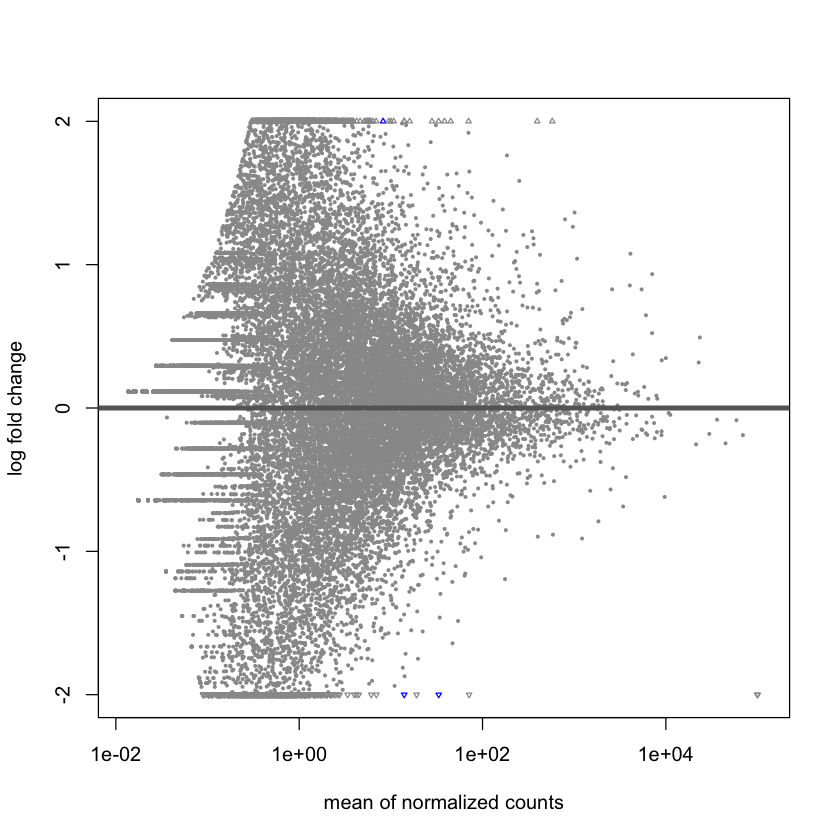

In [38]:
plotMA(res, ylim=c(-2,2))

In [39]:
head(res)

log2 fold change (MLE): Dissection_Preservation WholeCarcassCryochiller vs ImmediateLiquidNitrogen 
Wald test p-value: Dissection_Preservation WholeCarcassCryochiller vs ImmediateLiquidNitrogen 
DataFrame with 6 rows and 6 columns
                     baseMean log2FoldChange     lfcSE      stat    pvalue
                    <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000000001   2.592141       0.536531  0.833657  0.523633  0.600534
ENSMUSG00000000028   0.816284      -1.307796  1.408797 -0.857325  0.391265
ENSMUSG00000000031 576.596082       0.185986  0.373254  0.230369  0.817805
ENSMUSG00000000049   0.415825       2.474697  4.833107  0.491340  0.623186
ENSMUSG00000000056  24.051478       0.295295  0.413406  0.472404  0.636639
ENSMUSG00000000058   2.800361       1.090661  0.873906  1.133602  0.256962
                        padj
                   <numeric>
ENSMUSG00000000001         1
ENSMUSG00000000028         1
ENSMUSG00000000031         1
ENSMUSG00000000049      